## Dimension Reduction
Highdimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other. Of course, this also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger  extrapolations.

Reasons for dimensionlity reduction:
1. Data Compression
2. Speeding up the learining process

### Approaches For Dimension Reduction

#### Projection
In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. All training instances actually lie within (or close to) a much lower-dimensional subspace of the high-dimensional space. 
If we project every training instance perpendicularly onto this subspace (as represented by the short lines con‐
necting the instances to the plane), we get the new 2D dataset. The two axis of new 2-D plan will be different from the original plane.

<table>
    <tr>
        <td><img src="../notes_images/dimen_red_projection1.png" width=300 height=350></td>
        <td><img src="../notes_images/dimen_red_projection2.png" width=300 height=350></td>
    </tr>
    <tr>
        <td>3D projection close to 2D subspace</td>
        <td>Projected on 2D subspaces</td>
    </tr>
</table>

However, projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset.
Simply projecting onto a plane (e.g., by dropping x 3 ) would squash different layers of the Swiss roll together.

<img src="../notes_images/swiss_role_ds.png" width=300 height=350>
swiss role dataset 
<img src="../notes_images/squished_swiss_role.png" width=500 height=350>
Squished swiss role


## Manifold Learning

A 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space. More generally, a
d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane.

In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This
assumption is very often empirically observed.

## PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

The PCA tries to calculate a projection plane, so as to minimize the projction error of all the data points.

** Common practise is to calculate mean and standardize the dataset.

In general it first finds the `k` vectors $u^{(1)},u^{(2)},u^{(3)},...u^{(k)}$ from n vectors, onto which to project the data so as to minimize the projection error.

These `k` vectors are the vectors that __preserve the most variance__, as it will most likely lose less information than the other projections. 

Another way to justify this choice is that it is the axis that __minimizes the mean squared distance__ between the original dataset and its projection onto that axis.

PCA identifies the axis that accounts for the largest amount of variance in the training set. 

It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. 

If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth and fifth, and so on—as many axes as the number of dimensions in the dataset.

There exists a technique called SVD(Single Value Decomposition) that factorises(or decomposes) the matrix `X` into the multiplication of three vectors $U\sum V^T$. Where V contains all the PCs(Principle Components)

Procedure to calculate Principle Component Analysis algorithm:

1. Reduce data from n-dimensions to k-dimensions.
2. Compute `covariance matrix`

$$\sum = \frac{1}{m}\sum_{i=1}^{n} (x^{(i)})(x^{(i)})^{T}$$

3. Compute eigenvectors of matrix $\sum$:

    [u,s,v] = svd(Sigma)  ,where svd = singular value decomposition

#### Steps to calculate PCA:
1. Standardize the data.
2. 

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
wine_ds = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine_ds['data'], wine_ds['target'])


In [5]:
#1.Standardization
std_sca = StandardScaler()
X_train_norm = std_sca.fit_transform(X_train)

### Covariance Matrix
$$\sum = \frac{\big((X - \bar{x})^T (X - \bar{x})\big)}{n-1}$$

where, $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$

### EigenVectors vs EigenValues 
The vectors that are not knocked off from their basis vector before/after the transformations they are merely squished or streched.

If roation operation is performed on a 3D space, then if eigen value remains unchanged than its the axis of that rotation.

$$A\vec{v} = \lambda \vec{v}$$
$$det(\vec{v}(A  - I\lambda)) = 0$$


In [11]:
mean_vec = np.mean(X_train_norm,axis=0)
cov_mat = (X_train_norm - mean_vec).T.dot((X_train_norm - mean_vec))/(X_train_norm.shape[0]-1)

In [17]:
eig_val, eig_vecs = np.linalg.eig(cov_mat)

### Correlation Matrix
Especially, in the field of “Finance,” the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix.
This yields the same result in this case.

In probability theory and statistics, a covariance matrix (also known as auto-covariance matrix, dispersion matrix, variance matrix, or variance–covariance matrix) is a square matrix giving the covariance between each pair of elements of a given random vector. Any covariance matrix is symmetric and positive semi-definite and its main diagonal contains variances 

In [19]:
u,s,v = np.linalg.svd(X_train_norm.T)
print(u.shape) #eigen vectors

(13, 13)


#### Sorting Eigen Pairs
The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [25]:
eig_pairs = [(eig_val[i], eig_vecs[:,i]) for i in range(len(eig_val))]

In [30]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [33]:
total = sum(eig_val)
var_exp = [(val[0]/total) for val in eig_pairs]

In [37]:
cs=np.cumsum(var_exp)

In [36]:
from matplotlib import pyplot as plt

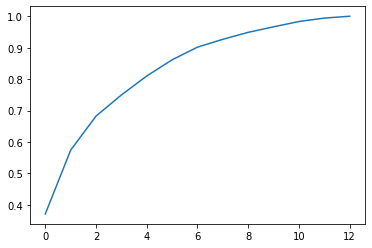

In [44]:
plt.plot(cs)


### Projection Matrix
It’s about time to get to the really interesting part: The  construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

If we want 4 features i.e. around 80% variance explanation. We use:

X.shape = (m x features)

X(m x features) DOT EigVec(features x 4)

In [50]:
proj_matrix = np.hstack((eig_pairs[0][1].reshape(13,1),
eig_pairs[0][1].reshape(13,1),
eig_pairs[0][1].reshape(13,1),
eig_pairs[0][1].reshape(13,1)))

In [52]:
new_feats = X_train_norm.dot(proj_matrix)

In [54]:
# doing the same with sklearn
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=4)
new_feats_sk = sklearn_pca.fit_transform(X_train_norm)

In [58]:
sklearn_pca.explained_variance_ratio_

array([0.37087359, 0.20293922, 0.10839221, 0.06717944])

# Linear Discriminant Analysis

PCA is unsupervised and LDA is supervised.